In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
ds = pd.read_csv('Default.csv')

In [17]:
ds.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [18]:
ds.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

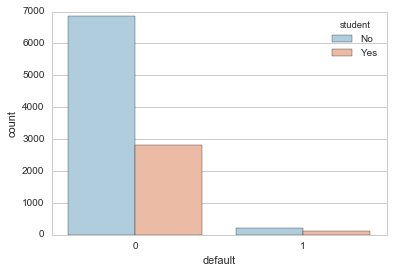

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='default',data=ds, hue='student',palette='RdBu_r')

In [21]:
stu = pd.get_dummies(ds['student'],drop_first=True)
ds_ = pd.concat([ds,stu],axis=1)
ds_.head()

,default,student,balance,income,Yes
0,0,No,729.526495,44361.62507,0
1,0,Yes,817.180407,12106.13470,1
2,0,No,1073.549164,31767.13895,0
3,0,No,529.250605,35704.49394,0
4,0,No,785.655883,38463.49588,0


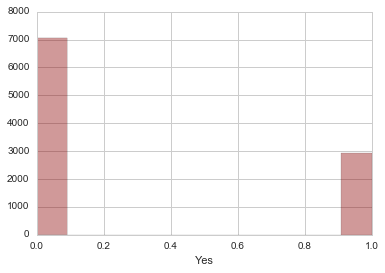

In [25]:
sns.distplot(ds_['Yes'],kde=False,color='darkred')

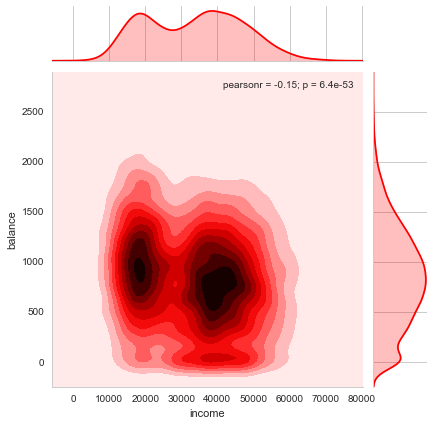

In [30]:
sns.jointplot(x='income',y='balance',data=ds_, color='red',kind='kde')

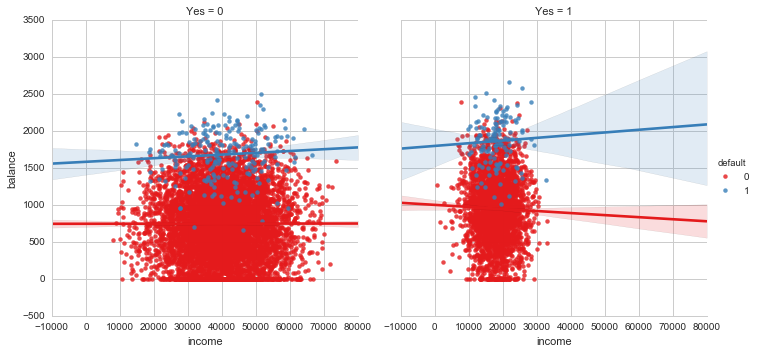

In [33]:
#sns.lmplot(x='income',y='balance',data=ds_)
plt.figure(figsize=(11,7))
sns.lmplot(y='balance',x='income',data=ds_,hue='default',
           col='Yes',palette='Set1')

In [34]:
ds_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
default    10000 non-null int64
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
Yes        10000 non-null uint8
dtypes: float64(2), int64(1), object(1), uint8(1)
memory usage: 322.3+ KB


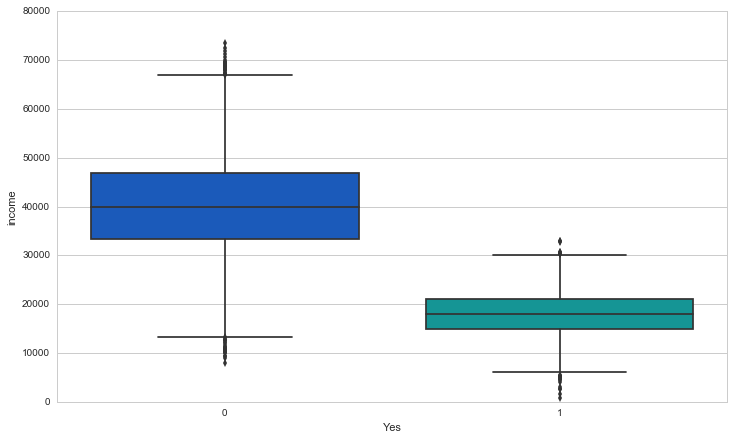

In [35]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Yes',y='income',data=ds_,palette='winter')

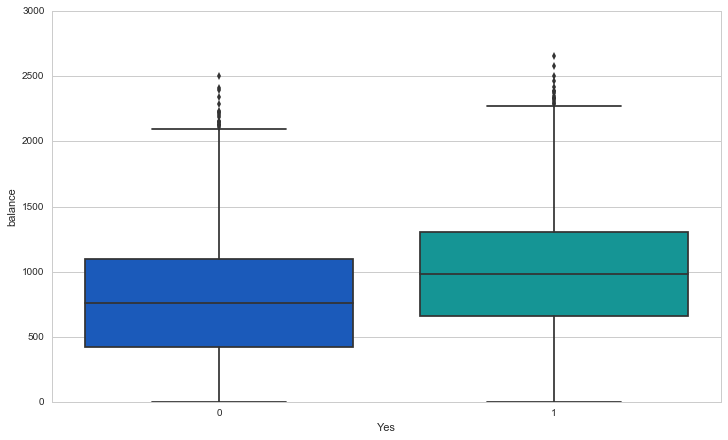

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Yes',y='balance',data=ds_,palette='winter')

In [37]:
from sklearn.model_selection import train_test_split

In [46]:
ds_.head()

,default,student,balance,income,Yes
0,0,No,729.526495,44361.62507,0
1,0,Yes,817.180407,12106.13470,1
2,0,No,1073.549164,31767.13895,0
3,0,No,529.250605,35704.49394,0
4,0,No,785.655883,38463.49588,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(ds_.drop(['default','student'],axis=1), 
                                                    ds_['default'], test_size=0.30, 
                                                    random_state=101)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2906
          1       0.00      0.00      0.00        94

avg / total       0.94      0.97      0.95      3000

